tensor([-0.2693, -1.8544]) tensor(9.9598)


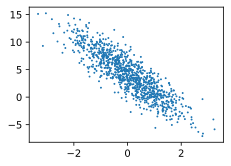

In [1]:
#y=Xw+b+ϵ

%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

print(features[0], labels[0])

#通过生成第二个特征features[:, 1]和标签 labels 的散点图，可以更直观地观察两者间的线性关系。
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);



In [18]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break
    
w = torch.tensor(np.random.normal(0,0.1,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

def linreg(X,w,b):  #定义线性模型
    X = torch.tensor(X, dtype=torch.float32)  #w,b   的dtupe为32，所以要统一为32位
    return torch.mm(X,w) + b

#定义损失函数
def squared_loss(y_hat,y):  #y真实值  y_hat为预测值
    return (y_hat - y.view(y_hat.size()))**2/2  #平方损失函数

#定义优化算法
#小批量梯度下降SGD
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size #param定义为param。data
        

#训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

print(true_w,'\n',w)
print(true_b,'\n',b)

tensor([[ 1.1608, -0.8656],
        [ 0.9669,  0.5463],
        [-0.2588, -0.1705],
        [-1.4022,  0.4220],
        [ 0.2130, -0.3864],
        [-0.9333,  1.4304],
        [ 0.5041, -0.2442],
        [-0.6186, -0.4634],
        [-0.1068, -0.0924],
        [ 0.5184,  0.5143]]) 
 tensor([ 9.4473,  4.2656,  4.2580, -0.0279,  5.9481, -2.5350,  6.0518,  4.5419,
         4.2990,  3.4977])
epoch 1, loss 0.039898
epoch 2, loss 0.000153
epoch 3, loss 0.000050
[2, -3.4] 
 tensor([[ 1.9993],
        [-3.3998]], requires_grad=True)
4.2 
 tensor([4.1990], requires_grad=True)


/home/cxking/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


NameError: name 'linreg' is not defined

In [23]:
#生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

#读取数据集
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True) #打乱后dataset数据后再随机提取size数量的data

for X, y in data_iter:
    print(X, y)
    break

    
#定义模型
#一个nn.Module实例应该包含一些层以及返回输出的前向传播（forward）方法。
import torch
import torch.nn as nn

class LinearNet(nn.Module):  #继承于nn.Module
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()  #集成父类属性
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构


tensor([[-0.1124, -1.1087],
        [-0.0162,  0.4098],
        [-0.5904, -1.4322],
        [ 0.0276,  1.2276],
        [ 0.7876,  0.3074],
        [-1.1409, -0.1556],
        [ 0.4731, -0.8417],
        [-0.9159, -1.1214],
        [ 1.2327,  0.0676],
        [-0.1785,  0.3218]]) tensor([7.7333, 2.7886, 7.8833, 0.0695, 4.7141, 2.4590, 8.0096, 6.1846, 6.4400,
        2.7451])
LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [31]:
#；利用nn.sequential来搭建网络
#Sequential是一个有序的容器，网络层将按照在传入Sequential的顺序依次被添加到计算图中。

#写法一
import torch
import torch.nn as nn

net = nn.Sequential(
    nn.Linear(num_inputs,1)
    #可传入其它层
    )
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


In [34]:
#写法二
import torch
import torch.nn as nn

net = nn.Sequential()
net.add_module('linear',nn.Linear(num_inputs,1))
#可传入其它层 net.add_module.....
print(net)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [40]:
#写法三
import torch
import torch.nn as nn

#使用OrderedDict会根据放入元素的先后顺序进行排序。
#由于进行了排序，所以OrderedDict对象的字典对象，
#如果其顺序不同那么Python也会把他们当做是两个不同的对象
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
            ('linear',nn.Linear(num_inputs,1))
    #添加其他网络
    
        ]))
        
print(net)
print(net[0])


Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [1]:
#可以通过net.parameters()来查看模型所有的-可学习参数-，
#此函数将返回一个生成器。

for param in net.parameters():
    print(param)


NameError: name 'net' is not defined

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
            
model.add_module(('conv1',nn.Conv2d(1, 10, kernel_size=5))
            
model.add_module(('relu1',F.relu())
            
model.add_module(('max_pooling',F.max_pool2d(2,2))
            
model.add_module(('conv2',nn.Conv2d(10, 20, kernel_size=5))
            
model.add_module(('conv2_drop',F.Dropout2d())
            
model.add_module(('max_pooling2',F.max_pool2d('conv2_drop',2))
            
model.add_module(('relu',nn.Relu())
            
model.add_module(('view1',relu.view(-1, 320))
            
model.add_module(('fc1',nn.Linear(320, 50))
            
model.add_module(('relu3',F.Relu(fc1))
            
model.add_module(('dropout2',nn.dropout(x, training=training)) 
            
model.add_module(('fc2',nn.Linear(50, 10))
            
model.add_module(('log_softmax',nn.log_softmax(fc2))
        ]))

print(Net)

SyntaxError: invalid syntax (<ipython-input-14-e5330743c286>, line 10)

In [21]:

import torch.nn as nn
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                  ('conv1', nn.Conv2d(1, 10, 5)),
                  ('max_pooling',F.max_pool2d((2,2),1))#class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

                  ('relu1', nn.ReLU()),
                  ('conv2', nn.Conv2d(10, 20, 5)),
                  ('relu2', nn.ReLU())
                ]))
 
print(model)


TypeError: max_pool2d(): argument 'input' (position 1) must be Tensor, not tuple